### Importing basic packages and modules

In [20]:
# for basic visualizations
import spacy
import pandas as pd
import numpy as np

'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nplt.style.use('fivethirtyeight')\n\n# for advanced visualizations\nimport plotly.offline as py\nfrom plotly.offline import init_notebook_mode, iplot\nimport plotly.graph_objs as go\nfrom plotly import tools\ninit_notebook_mode(connected = True)\nimport plotly.figure_factory as ff\n"

In [4]:
#loading english module
nlp = spacy.load('en_core_web_sm')

In [8]:
#reading the csv file
data = pd.read_csv('/content/sample_data/reviews.csv')

In [9]:
#display data
data.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."


In [10]:
#to see any null data is there
data.isnull().any().any()

False

In [14]:
txt = data["Review"]
txt

0      Been to this place 3-4 times. Prakash is alway...
1      I recently visited Oliver Brown on a weekend f...
2                             Very watery ans thin shake
3      it was not cheese burst pizza.. only cheeze wa...
4      Yammi.,....test burger is best I love 💗 this B...
                             ...                        
770    The taste is good but the quantity is low as c...
771                               pathetic food rejected
772    thupka pack on cold drink packing, taste less,...
773                                     very fast dilver
774    Tried their Hummus and Pita bread today. Didn'...
Name: Review, Length: 775, dtype: object

In [18]:
doc = nlp(txt[1])
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)

odata = pd.DataFrame(olist)
odata.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odata

,Text,StartIndex,Lemma,IsPunctuation,IsSpace,WordShape,PartOfSpeech,POSTag
0,I,0,I,False,False,X,PRON,PRP
1,recently,2,recently,False,False,xxxx,ADV,RB
2,visited,11,visit,False,False,xxxx,VERB,VBD
3,Oliver,19,Oliver,False,False,Xxxxx,PROPN,NNP
4,Brown,26,Brown,False,False,Xxxxx,PROPN,NNP
...,...,...,...,...,...,...,...,...
70,forward,351,forward,False,False,xxxx,ADV,RB
71,to,359,to,False,False,xx,ADP,IN
72,my,362,my,False,False,xx,PRON,PRP$
73,next,365,next,False,False,xxxx,ADJ,JJ


Analyze the 'Review' Column

In [21]:
# Displaying some random reviews to understand the content
random_indices = np.random.choice(data.index, 5, replace=False)
for idx in random_indices:
    print(f"Review {idx}:\n{data.loc[idx, 'Review']}\n{'-'*80}\n")

Review 633:
Worst pasta ever. They have simply used Malai kofta gravy in it. 
--------------------------------------------------------------------------------

Review 153:
Taste was not good
--------------------------------------------------------------------------------

Review 279:
Got the wrong order
--------------------------------------------------------------------------------

Review 354:
Lovely evening with good view.. amazing hookahMust visit place in Bangalore service staff are really friendly and polite 
--------------------------------------------------------------------------------

Review 7:
The owner didn't let us sit in the AC though it was not at all reserved. We already had booked our table priorly then also he didn't give us the AC table to sit. He said that you should call us and book the AC table but no one ever picks the call at all. 
--------------------------------------------------------------------------------



Check for Missing Values or Anomalies

In [22]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Checking for any anomalies in 'Overall Rating' (e.g., ratings outside the expected range)
print("\nUnique values in 'Overall Rating':", data['Overall_Rating'].unique())

Missing Values per Column:
Index             0
Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            0
dtype: int64

Unique values in 'Overall Rating': ['3.9' '3' '3.8' '4.3' '3.7' '4.8' '4.1' '4' '4.2' '3.6' '4.4' '-' '3.5'
 '3.4' '3.1' '3.3' '3.2' '4.5' '4.9' 'New' '2.8' '2.7' '2.5' '2.9' '2.6']


In [50]:
## removing 'nan', 'NEW', '-' values
data["Overall_Rating"]=data["Overall_Rating"].replace("NEW", np.nan)
data["Overall_Rating"]=data["Overall_Rating"].replace("New", np.nan)
data['Overall_Rating']=data['Overall_Rating'].replace('NaN',np.nan)
data['Overall_Rating']=data['Overall_Rating'].replace('-',np.nan)
data['Overall_Rating']=data['Overall_Rating'].replace('nan',np.nan)
data['Overall_Rating'].fillna(data['Overall_Rating'].median(), inplace=True)

In [51]:
print("\nUnique values in 'Overall Rating':", data['Overall_Rating'].unique())


Unique values in 'Overall Rating': [3.9 3.  3.8 4.3 3.7 4.8 4.1 4.  4.2 3.6 4.4 3.5 3.4 3.1 3.3 3.2 4.5 4.9
 2.8 2.7 2.5 2.9 2.6]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           775 non-null    int64  
 1   Name            775 non-null    object 
 2   Overall_Rating  699 non-null    object 
 3   Cuisine         775 non-null    object 
 4   Rate for two    775 non-null    object 
 5   City            775 non-null    object 
 6   Review          775 non-null    object 
 7   Cleaned_Review  775 non-null    object 
 8   Sentiment       775 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 54.6+ KB


In [ ]:
# converting to float type data

data['Overall_Rating']=data['Overall_Rating'].astype(float)

print(data['Overall_Rating'].dtypes)


'''
# Convert 'Overall_Rating' to numeric, setting errors='coerce' to turn problematic values into NaNs
data['Overall_Rating'] = pd.to_numeric(data['Overall_Rating'], errors='coerce')

'''

float64


In [ ]:
#Which cuisine do customers like the most?

b=data.groupby('Cuisine')['Overall_Rating'].mean().reset_index().sort_values(by='Overall_Rating',ascending=False)
print(b.head(5))

                                               Cuisine  Overall_Rating
150                                     Cafe, European             4.9
51   Cafe, Coffee, Beverages, Desserts, Bakery, San...             4.8
45   Cafe, Coffee, Bakery, Fast Food, Continental, ...             4.8
9    Cafe, BBQ, Asian, Continental, Fast Food, Ital...             4.8
173  Cafe, Fast Food, Italian, Desserts, Beverages,...             4.5


In [ ]:
# What are the top 10 highest-rated restaurants?

grp2=data.groupby('Name')['Overall_Rating'].mean().reset_index().sort_values(by='Overall_Rating',ascending=False)[0:10]
print(grp2)

                                       Name  Overall_Rating
166                           Le Flamington             4.9
298           Zolocrust - Hotel Clarks Amer             4.8
212                         SLAY Coffee Bar             4.8
181                                   Mleko             4.8
200  Pune Baking Company - JW Marriott Pune             4.5
48                             Cafe CakeBee             4.5
210                   Roastery Coffee House             4.5
295                      Your Own Brew Cafe             4.5
83           Camiano Patisserie & Brasserie             4.5
296                              Yummy Yoga             4.5


2. Data Preprocessing

2.1 Tokenize and Clean the 'Review' Column

The 'Review' column was tokenized and cleaned by removing stopwords and non-alphabetic characters

In [28]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Downloading the stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Function to clean and tokenize reviews
def clean_review(review):
    tokens = word_tokenize(review)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

data['Cleaned_Review'] = data['Review'].apply(clean_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Extract Sentiment from the 'Review' Column

In [29]:
from textblob import TextBlob

# Function to get the polarity of the review
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

data['Sentiment'] = data['Cleaned_Review'].apply(get_sentiment)

Feature Engineering

Generate a 'Sentiment Score' for Each Review

The sentiment of each review was quantified using the TextBlob library, resulting in a 'Sentiment_Score' for each review.

In [54]:
from textblob import TextBlob

# Function to get the polarity of the review
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

data['Sentiment_Score'] = data['Cleaned_Review'].apply(get_sentiment)

In [55]:
# Now, create the 'User_Profile' feature
data['User_Profile'] = data[['Overall_Rating', 'Sentiment_Score']].mean(axis=1)

Develop a 'Cafe Profile'

A profile was developed for each cafe, capturing the average ratings and sentiments associated with it

In [56]:
# Grouping by cafe name to get the average rating and sentiment score for each cafe
cafe_profile = data.groupby('Name').agg({
    'Overall_Rating': 'mean',
    'Sentiment_Score': 'mean'
}).reset_index()

# Renaming columns for clarity
cafe_profile.columns = ['Name', 'Average_Rating', 'Average_Sentiment']

# Merging the cafe profile back to the main dataset
data = pd.merge(data, cafe_profile, on='Name', how='left')

Split the Data into Training and Testing Sets
The dataset was split into training and testing sets to build and validate the recommendation model.

In [57]:
from sklearn.model_selection import train_test_split

# Assuming each row is a unique user (since the dataset doesn't seem to have a user identifier)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

Implement Collaborative Filtering
Collaborative filtering was implemented using the SVD algorithm from the Surprise library.

In [58]:
!pip install surprise

from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import cross_validate

# Define a reader and the rating scale (assuming rating scale is 0-5; adjust if different)
reader = Reader(rating_scale=(0, 5))

# Create the dataset
data_surprise = Dataset.load_from_df(train_data[['Name', 'Index', 'Overall_Rating']], reader)

# Use the SVD algorithm
algo = SVD()

# Train on the dataset
trainset = data_surprise.build_full_trainset()
algo.fit(trainset)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811593 sha256=669b43932f691f1dac944031694a9a56a73c56c66edfbb08e147d141a84adecb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Incorporate Sentiment Scores to Weigh the Recommendations
Sentiment scores were incorporated to weigh the recommendations, giving more weight to cafes with positive sentiments.

In [59]:
def weighted_recommendation(user_id, algo, data, sentiment_weight=0.2):
    # Get the list of all cafe names
    cafes = data['Name'].unique()

    # Predict ratings for all cafes
    predictions = [algo.predict(user_id, cafe).est for cafe in cafes]

    # Incorporate sentiment scores
    average_sentiments = data.groupby('Name')['Sentiment_Score'].mean().to_dict()
    weighted_scores = [(pred + sentiment_weight * average_sentiments[cafe]) for pred, cafe in zip(predictions, cafes)]

    # Get the top cafes based on weighted scores
    top_cafes = sorted([(score, cafe) for cafe, score in zip(cafes, weighted_scores)], reverse=True)

    return top_cafes

# Example: Get top 5 recommendations for a user
user_id = train_data['Index'].iloc[0]
recommendations = weighted_recommendation(user_id, algo, train_data)
print("Top 5 Recommendations:", recommendations[:5])

Top 5 Recommendations: [(3.9993548387096776, 'Uphoria- Cafe & Restro'), (3.9993548387096776, 'Stava Bistro'), (3.9993548387096776, 'Caffeinate And Chill'), (3.9693548387096773, 'TROT - The Republic Of Taste'), (3.9685215053763443, 'Pannacottas')]


In [63]:
data.head()

,Index,Name,Overall_Rating,Cuisine,Rate for two,City,Review,Cleaned_Review,Sentiment,Sentiment_Score,User_Profile,Average_Rating,Average_Sentiment
0,0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...,place times prakash always sweet accommodating...,0.675000,0.675000,2.287500,3.9,0.531944
1,1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...,recently visited oliver brown weekend cup iced...,0.388889,0.388889,2.144444,3.9,0.531944
2,2,Crush Coffee,3.0,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake,watery ans thin shake,-0.400000,-0.400000,1.300000,3.0,-0.400000
3,3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...,cheese burst pizza cheeze top happy pizza sent...,0.650000,0.650000,2.225000,3.8,0.541667
4,4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B...",test burger best love bergerand fry also missing,0.433333,0.433333,2.116667,3.8,0.541667


Validate the Model Using the Testing Set and Measure its Accuracy
The model was validated using the testing set, and its accuracy was measured using the RMSE metric.

In [60]:
from surprise import accuracy

# Create a test set
testset = [[row['Name'], row['Index'], row['Overall_Rating']] for _, row in test_data.iterrows()]
predictions = algo.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.3290
RMSE: 0.3289564357781034


Interpretation and Communication of Results
Generate a List of Top-Recommended Cafes for a Given User
A function was developed to generate a list of top-recommended cafes for a given user based on their past ratings and the sentiment of their reviews.

In [61]:
def get_top_recommendations(user_id, algo, data, top_n=5):
    recommendations = weighted_recommendation(user_id, algo, data)
    return recommendations[:top_n]

user_id = train_data['Index'].iloc[0]
top_recommendations = get_top_recommendations(user_id, algo, train_data)
print("Top Recommended Cafes:")
for idx, (score, cafe) in enumerate(top_recommendations, 1):
    print(f"{idx}. {cafe} (Score: {score:.2f})")

Top Recommended Cafes:
1. Uphoria- Cafe & Restro (Score: 4.00)
2. Stava Bistro (Score: 4.00)
3. Caffeinate And Chill (Score: 4.00)
4. TROT - The Republic Of Taste (Score: 3.97)
5. Pannacottas (Score: 3.97)


Visualize User Preferences and How They Align with the Recommendations
A visualization was created to display a user's ratings for various cafes, helping understand their preferences and how they align with the model's recommendations.

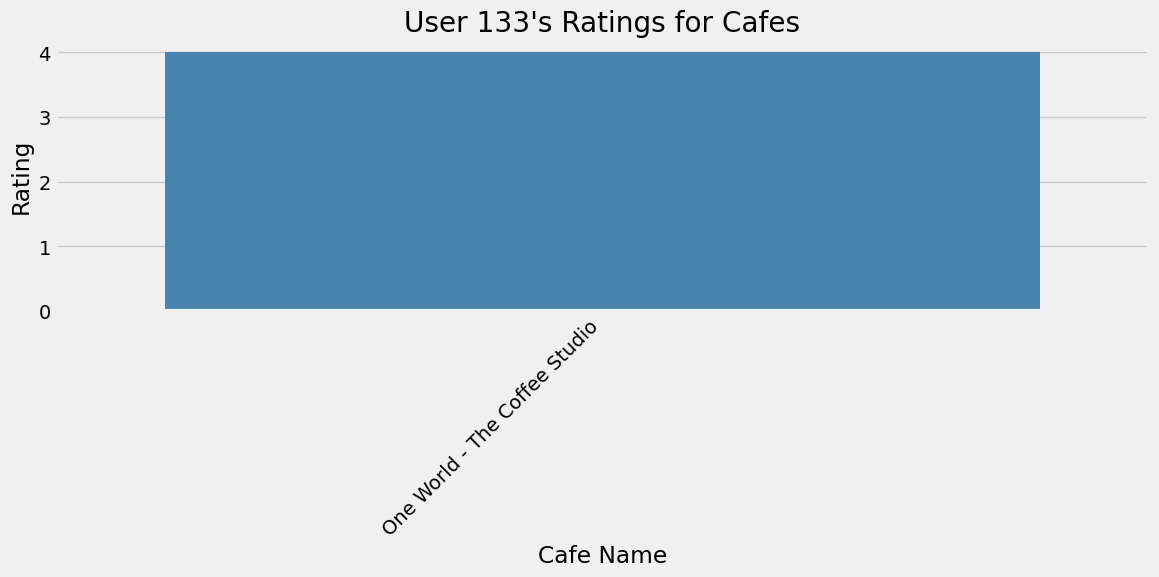

In [62]:
def visualize_user_preferences(user_id, data):
    user_data = data[data['Index'] == user_id]

    plt.figure(figsize=(12, 6))

    # Plotting user ratings
    sns.barplot(x='Name', y='Overall_Rating', data=user_data, palette="Blues_d")
    plt.xticks(rotation=45, ha='right')
    plt.title(f"User {user_id}'s Ratings for Cafes")
    plt.ylabel('Rating')
    plt.xlabel('Cafe Name')
    plt.tight_layout()
    plt.show()

visualize_user_preferences(user_id, train_data)